#IMPORT DATA

PROJECT PRESENTATION LINK:
https://drive.google.com/file/d/14uZCeXn_elJezmTO7VFk7alEdkmvgKei/view?usp=share_link

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as skl
from sklearn.metrics import mean_absolute_error


In [ ]:
df=pd.read_csv("/content/student-mat (1).csv",sep=';')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [ ]:
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [ ]:
df.iloc[:,32]
for i in range(df.shape[1]):
  print(df.iloc[:,i].unique())
  print(df.iloc[:,i].value_counts())

['GP' 'MS']
GP    349
MS     46
Name: school, dtype: int64
['F' 'M']
F    208
M    187
Name: sex, dtype: int64
[18 17 15 16 19 22 20 21]
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64
['U' 'R']
U    307
R     88
Name: address, dtype: int64
['GT3' 'LE3']
GT3    281
LE3    114
Name: famsize, dtype: int64
['A' 'T']
T    354
A     41
Name: Pstatus, dtype: int64
[4 1 3 2 0]
4    131
2    103
3     99
1     59
0      3
Name: Medu, dtype: int64
[4 1 2 3 0]
2    115
3    100
4     96
1     82
0      2
Name: Fedu, dtype: int64
['at_home' 'health' 'other' 'services' 'teacher']
other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64
['teacher' 'other' 'services' 'health' 'at_home']
other       217
services    111
teacher      29
at_home      20
health       18
Name: Fjob, dtype: int64
['course' 'other' 'home' 'reputation']
course        145
home          109
reputation    105
other          3

In [ ]:
df.absences.value_counts()

0     115
2      65
4      53
6      31
8      22
10     17
14     12
12     12
3       8
16      7
7       7
5       5
18      5
20      4
11      3
9       3
13      3
15      3
22      3
1       3
38      1
30      1
40      1
23      1
19      1
28      1
75      1
21      1
24      1
56      1
26      1
54      1
25      1
17      1
Name: absences, dtype: int64

In [ ]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


1.HOW DOES ABSENCES EFFECT TO G3

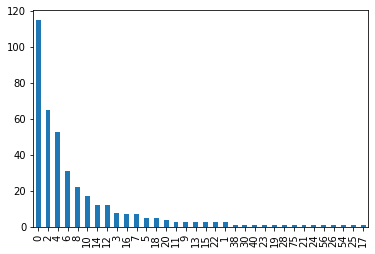

In [ ]:
df.absences.value_counts().plot(kind='bar')


#DATA CLEANING

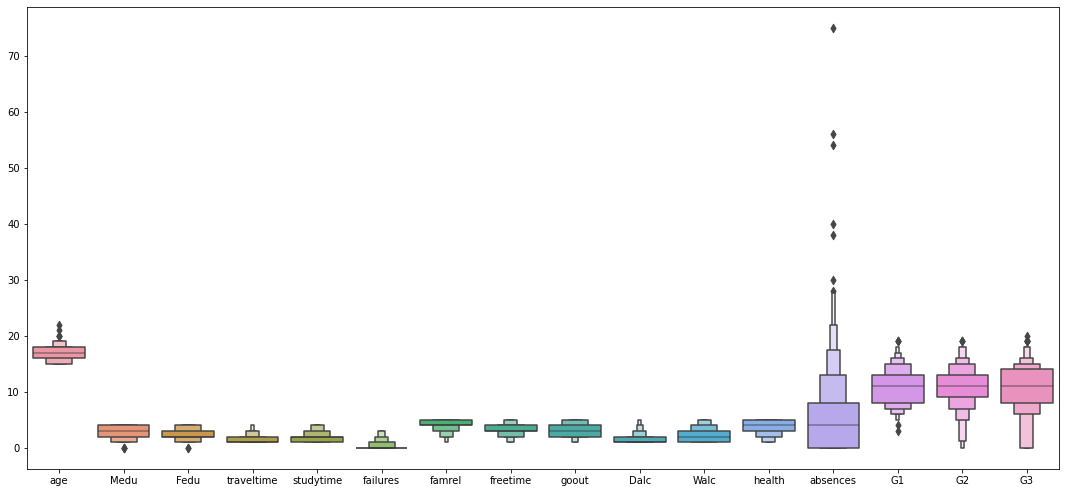

In [ ]:
plt.rcParams["figure.figsize"] = [18.50, 8.50]
out=sns.boxenplot(data=df)

In [ ]:
for x in ['absences']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(3.5*intr_qr)
    min = q25-(3.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan
    

In [ ]:
for x in ['Fedu','traveltime','studytime','famrel','freetime','Dalc','age','G1','G2','G3']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan
    


In [ ]:
df.dropna(inplace=True)

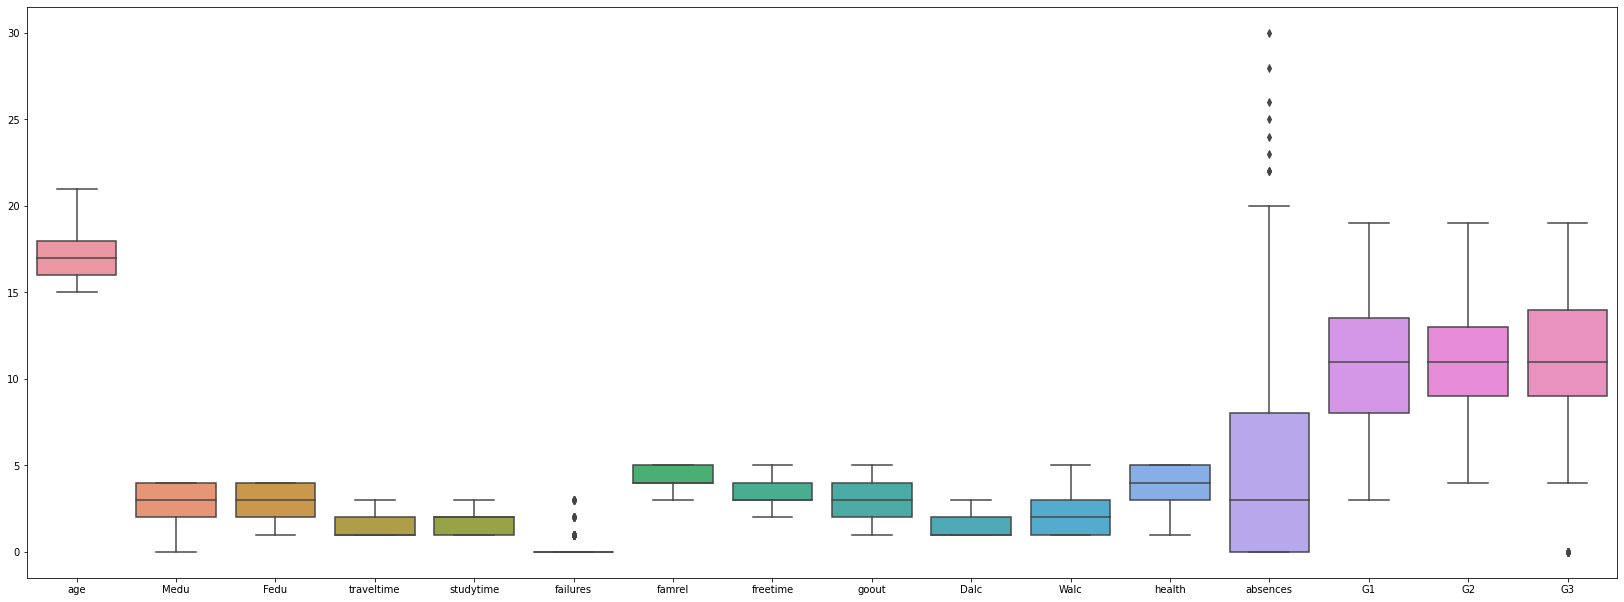

In [ ]:
plt.rcParams["figure.figsize"] = [28.50, 10.50]
out=sns.boxplot(data=df)

In [ ]:
df.G3.unique()

array([ 6., 10., 15., 11., 19.,  9., 12., 14., 16.,  5.,  8., 17., 18.,
       13.,  7.,  0.,  4.])

In [ ]:
df['final_grade'] = 'na'
df.loc[(df.G3 >= 15) & (df.G3 <= 20), 'final_grade'] = 'excellent' 
df.loc[(df.G3 >= 10) & (df.G3 <= 14), 'final_grade'] = 'good' 
df.loc[(df.G3 >= 7) & (df.G3 <= 9), 'final_grade'] = 'fair' 
df.loc[(df.G3 >= 0) & (df.G3 <= 6), 'final_grade'] = 'poor' 
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,final_grade
0,GP,F,18.0,U,GT3,A,4,4.0,at_home,teacher,...,3.0,4,1.0,1,3,6.0,5.0,6.0,6.0,poor
1,GP,F,17.0,U,GT3,T,1,1.0,at_home,other,...,3.0,3,1.0,1,3,4.0,5.0,5.0,6.0,poor
2,GP,F,15.0,U,LE3,T,1,1.0,at_home,other,...,3.0,2,2.0,3,3,10.0,7.0,8.0,10.0,good
3,GP,F,15.0,U,GT3,T,4,2.0,health,services,...,2.0,2,1.0,1,5,2.0,15.0,14.0,15.0,excellent
4,GP,F,16.0,U,GT3,T,3,3.0,other,other,...,3.0,2,1.0,2,5,4.0,6.0,10.0,10.0,good


In [ ]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,final_grade
0,GP,F,18.0,U,GT3,A,4,4.0,at_home,teacher,...,3.0,4,1.0,1,3,6.0,5.0,6.0,6.0,poor
1,GP,F,17.0,U,GT3,T,1,1.0,at_home,other,...,3.0,3,1.0,1,3,4.0,5.0,5.0,6.0,poor
2,GP,F,15.0,U,LE3,T,1,1.0,at_home,other,...,3.0,2,2.0,3,3,10.0,7.0,8.0,10.0,good
3,GP,F,15.0,U,GT3,T,4,2.0,health,services,...,2.0,2,1.0,1,5,2.0,15.0,14.0,15.0,excellent
4,GP,F,16.0,U,GT3,T,3,3.0,other,other,...,3.0,2,1.0,2,5,4.0,6.0,10.0,10.0,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,MS,F,19.0,R,GT3,T,2,3.0,services,other,...,4.0,2,1.0,2,5,0.0,7.0,5.0,0.0,poor
388,MS,F,18.0,U,LE3,T,3,1.0,teacher,services,...,3.0,4,1.0,1,1,0.0,7.0,9.0,8.0,fair
392,MS,M,21.0,R,GT3,T,1,1.0,other,other,...,5.0,3,3.0,3,3,3.0,10.0,8.0,7.0,fair
393,MS,M,18.0,R,LE3,T,3,2.0,services,other,...,4.0,1,3.0,4,5,0.0,11.0,12.0,10.0,good


#EDA

2.WHAT IS THE PERFORMANCE OF THE STUDENTS?

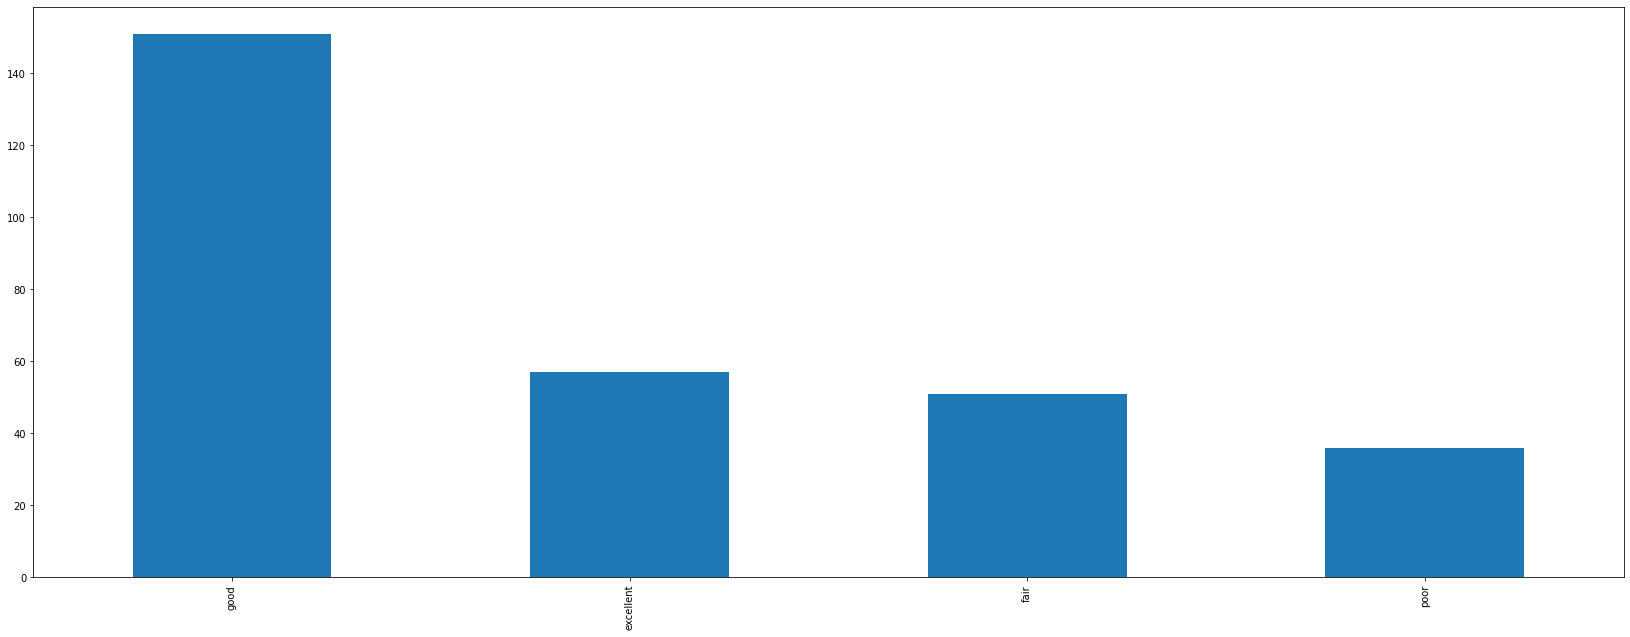

In [ ]:
#sns.scatterplot(['grade'],data=df)
df.final_grade.value_counts().plot(kind='bar')


3.HOW DOES AGE OF THE STUDENTS EFFECTS THEIR GRADES

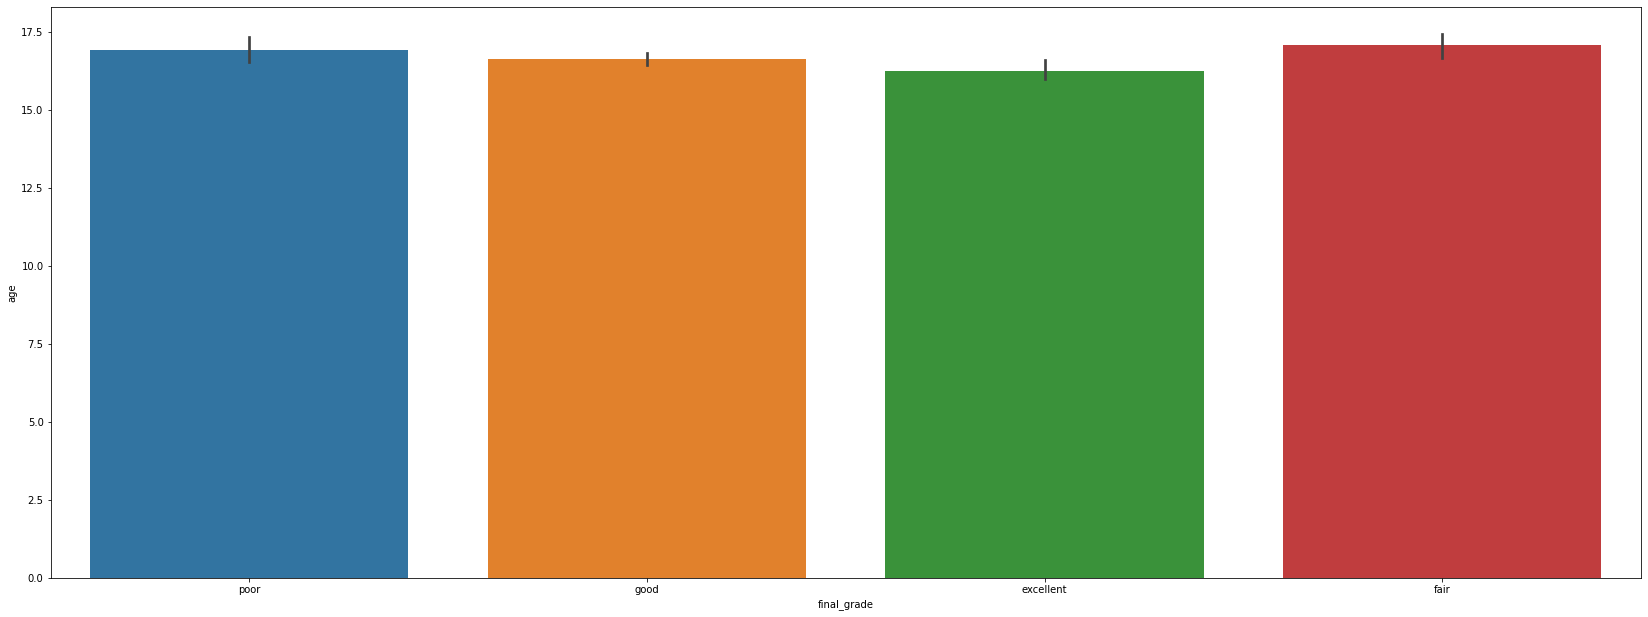

In [ ]:
sns.barplot(x='final_grade',y='age',data=df)

4.ON WHAT SCALE DOES THE CONSUMPTION OF ALOCOHOL DIFFER FOR WEEKEND AND WEEKDAYS

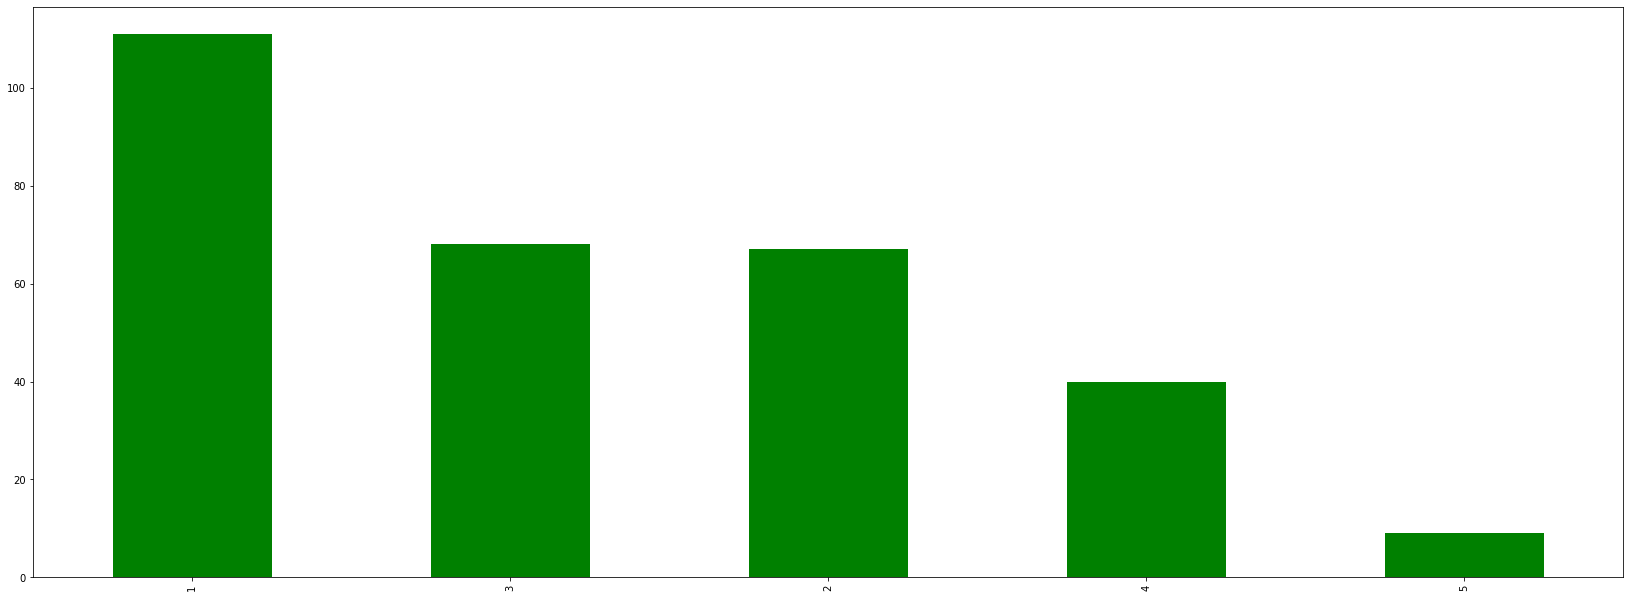

In [ ]:
df.Walc.value_counts().plot(kind='bar',color='green')


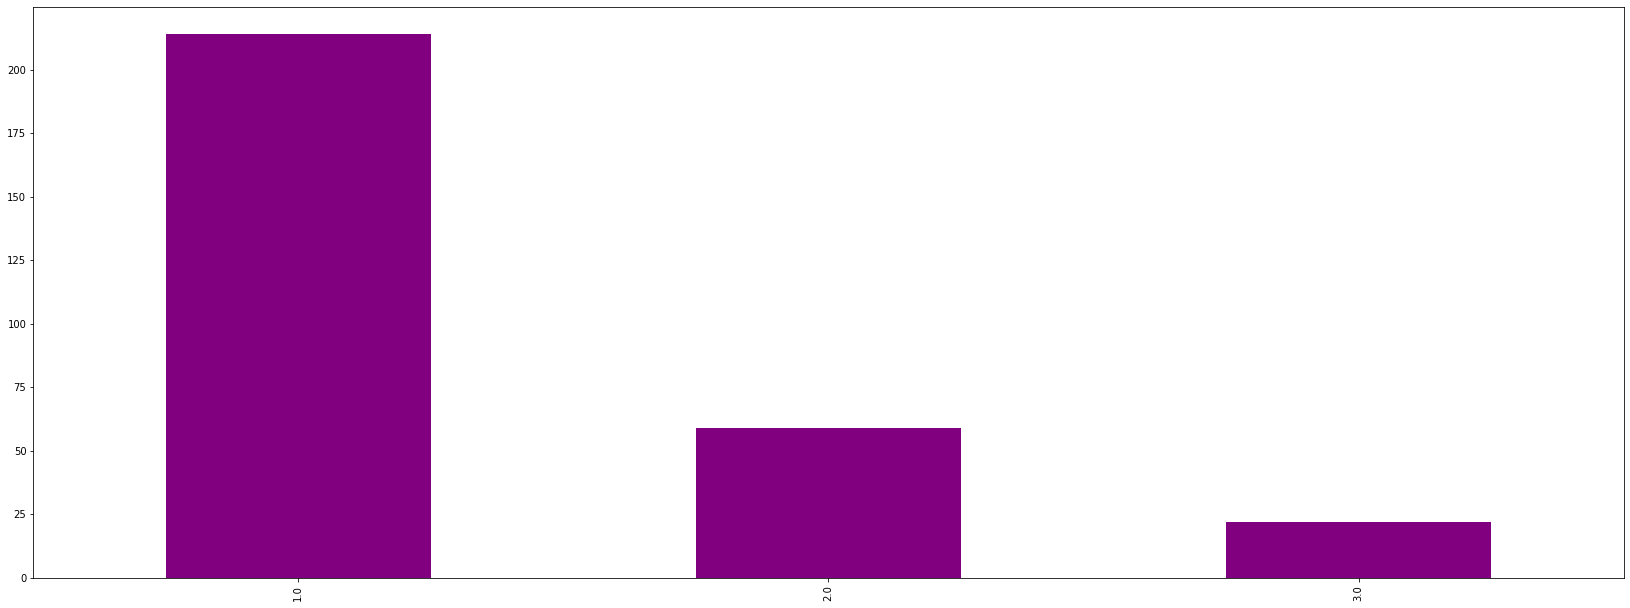

In [ ]:
df.Dalc.value_counts().plot(kind='bar',color='purple')

5.HOW DOES ALCOHOL CONSUMPTION EFFECT THEIR FINAL GRADES ?

In [ ]:
perc = (lambda col: col/col.sum())
index = ['excellent','good','fair','poor']
Walc_pd1 = pd.crosstab(index=df.final_grade, columns=df.Walc)
Walc_pd = np.log(Walc_pd1)
Walc_perc = Walc_pd.apply(perc).reindex(index)

<Figure size 2052x756 with 0 Axes>

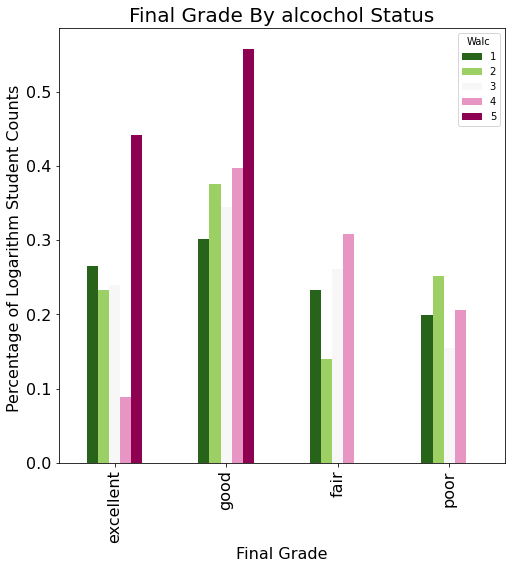

In [ ]:
plt.figure()
Walc_perc.plot.bar(colormap="PiYG_r", fontsize=16, figsize=(8,8))
plt.title('Final Grade By alcochol Status', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

In [ ]:
perc = (lambda col: col/col.sum())
index = ['excellent','good','fair','poor']
address_pd1 = pd.crosstab(index=df.final_grade, columns=df.address)
address_pd = np.log(address_pd1)
address_perc = address_pd.apply(perc).reindex(index)

<Figure size 2052x756 with 0 Axes>

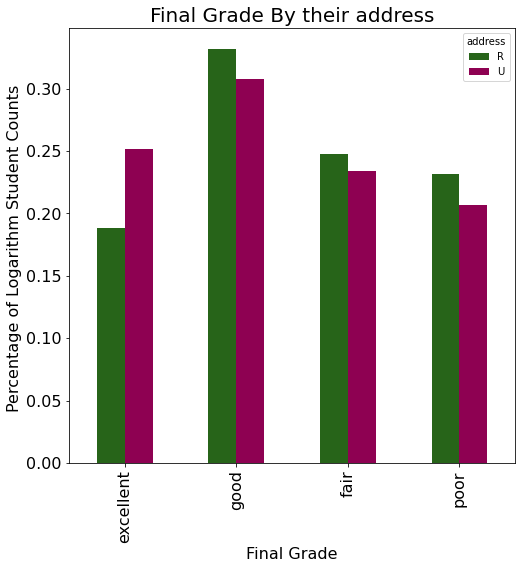

In [ ]:
plt.figure()
address_perc.plot.bar(colormap="PiYG_r", fontsize=16, figsize=(8,8))
plt.title('Final Grade By their address', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

In [ ]:
perc = (lambda col: col/col.sum())
index = ['excellent','good','fair','poor']
sex_pd1 = pd.crosstab(index=df.final_grade, columns=df.sex)
sex_pd = np.log(sex_pd1)
sex_perc = sex_pd.apply(perc).reindex(index)

<Figure size 2052x756 with 0 Axes>

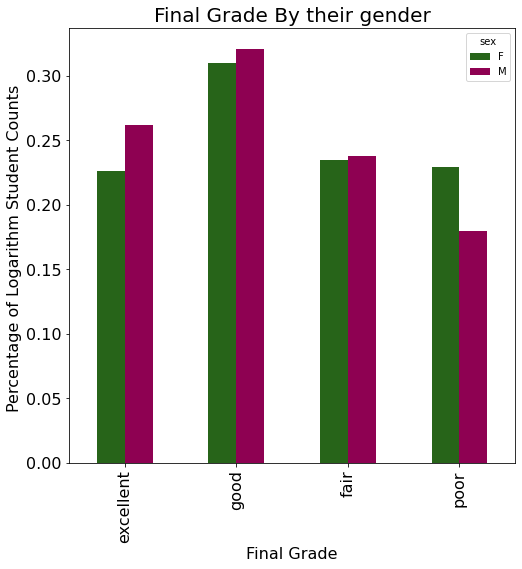

In [ ]:
plt.figure()
sex_perc.plot.bar(colormap="PiYG_r", fontsize=16, figsize=(8,8))
plt.title('Final Grade By their gender', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

6.WHAT IS THE HEALTH CONDITION OF THE STUDENTS AND HOW DOES THEIR HEALTH EFFECT THEIR GRADES?

<function matplotlib.pyplot.show(*args, **kw)>

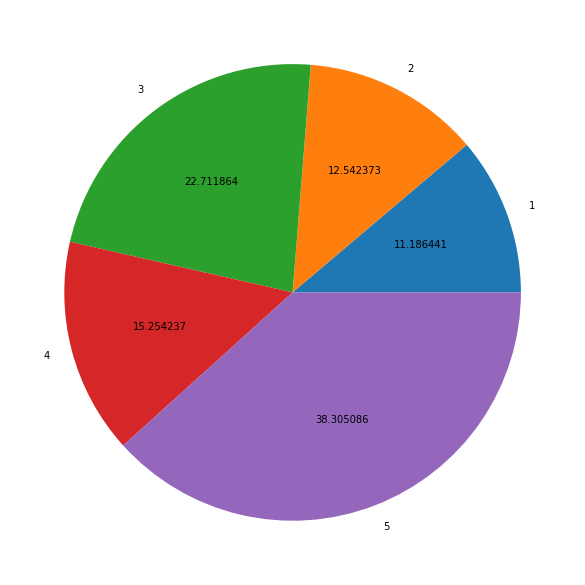

In [ ]:
c=df.groupby("health")["health"].count()
plt.pie(c,labels=c.index,autopct="%3f")
plt.show


In [ ]:
perc = (lambda col: col/col.sum())
index = ['excellent','good','fair','poor']
health_pd1 = pd.crosstab(index=df.final_grade, columns=df.health)
health_pd = np.log(health_pd1)
health_perc = health_pd.apply(perc).reindex(index)

<Figure size 2052x756 with 0 Axes>

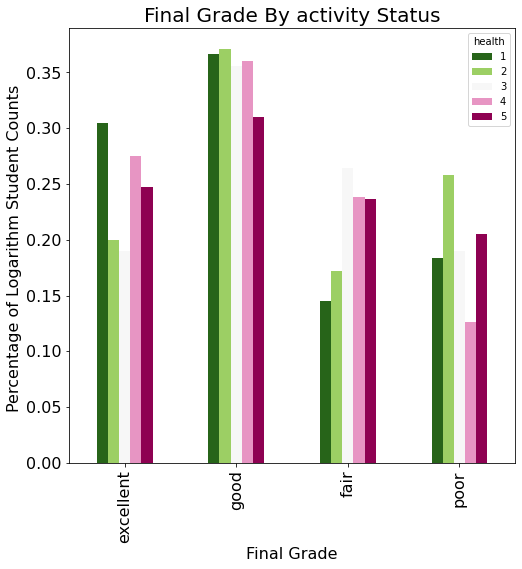

In [ ]:
plt.figure()
health_perc.plot.bar(colormap="PiYG_r", fontsize=16, figsize=(8,8))
plt.title('Final Grade By activity Status', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

7.DOES ENGAGING IN VARIOUS ACTIVITIES INFLUENCE THEIR STUDIES?

In [ ]:

perc = (lambda col: col/col.sum())
index = ['excellent','good','fair','poor']
activity_pd1 = pd.crosstab(index=df.final_grade, columns=df.activities)
activity_pd = np.log(activity_pd1)
activity_perc = activity_pd.apply(perc).reindex(index)

<Figure size 2052x756 with 0 Axes>

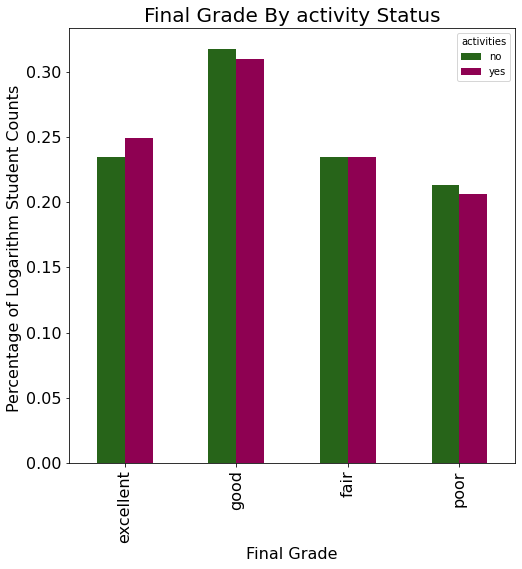

In [ ]:
plt.figure()
activity_perc.plot.bar(colormap="PiYG_r", fontsize=16, figsize=(8,8))
plt.title('Final Grade By activity Status', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

8.DOES GOING OUT REALLY EFFECT THE STUDY TIME

Text(0.5, 0, 'goout')

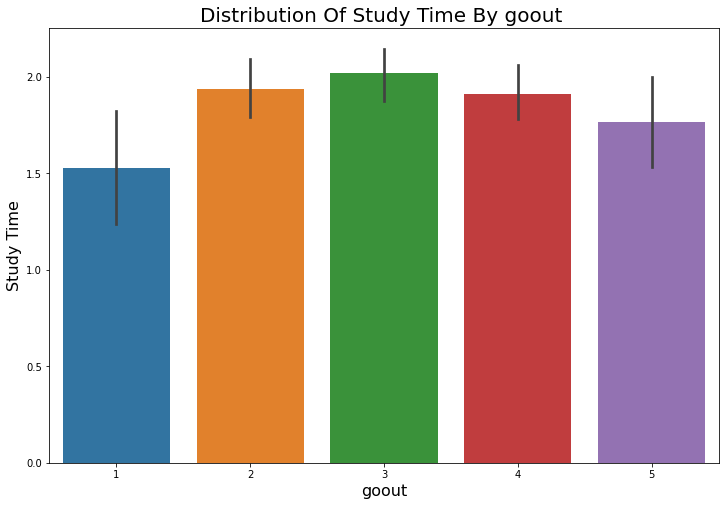

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x='goout', y='studytime', data=df)
plt.title('Distribution Of Study Time By goout ', fontsize=20)
plt.ylabel('Study Time', fontsize=16)
plt.xlabel('goout', fontsize=16)

family

In [ ]:
perc = (lambda col: col/col.sum())
index = ['excellent','good','fair','poor']
famsize_pd1 = pd.crosstab(index=df.final_grade, columns=df.famsize)
famsize_pd = np.log(famsize_pd1)
famsize_perc = famsize_pd.apply(perc).reindex(index)

<Figure size 2052x756 with 0 Axes>

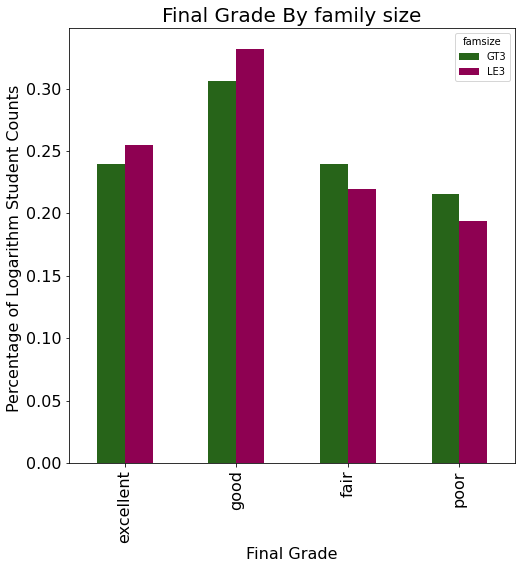

In [ ]:
plt.figure()
famsize_perc.plot.bar(colormap="PiYG_r", fontsize=16, figsize=(8,8))
plt.title('Final Grade By family size', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

In [ ]:
perc = (lambda col: col/col.sum())
index = ['excellent','good','fair','poor']
Pstatus_pd1 = pd.crosstab(index=df.final_grade, columns=df.Pstatus)
Pstatus_pd = np.log(Pstatus_pd1)
Pstatus_perc = Pstatus_pd.apply(perc).reindex(index)

<Figure size 2052x756 with 0 Axes>

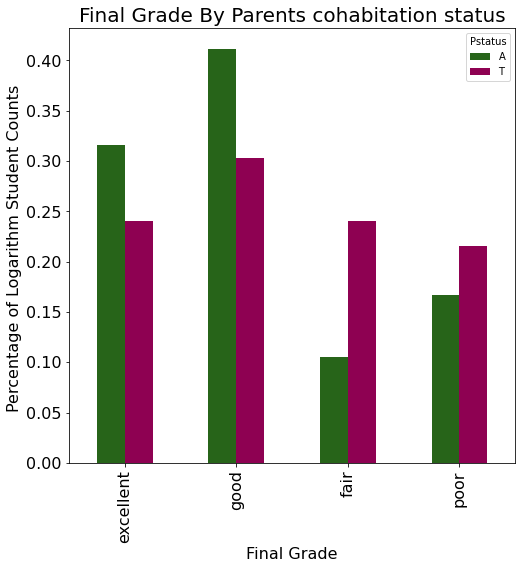

In [ ]:
plt.figure()
Pstatus_perc.plot.bar(colormap="PiYG_r", fontsize=16, figsize=(8,8))
plt.title('Final Grade By Parents cohabitation status', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

mother education

In [ ]:
perc = (lambda col: col/col.sum())
index = ['excellent','good','fair','poor']
Medu_pd1 = pd.crosstab(index=df.final_grade, columns=df.Medu)
Medu_pd = np.log(Medu_pd1)
Medu_perc = Medu_pd.apply(perc).reindex(index)

<Figure size 2052x756 with 0 Axes>

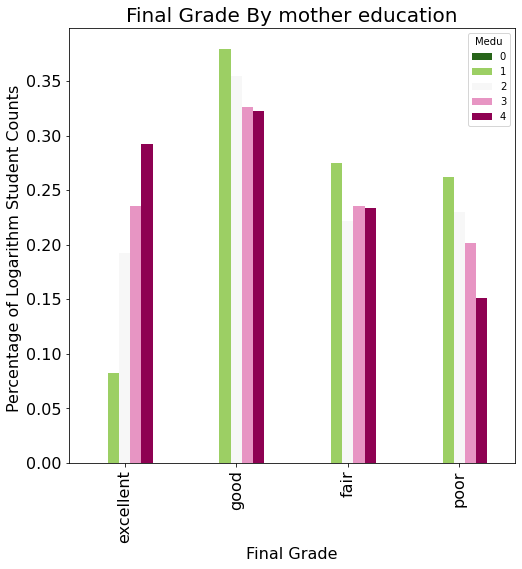

In [ ]:
plt.figure()
Medu_perc.plot.bar(colormap="PiYG_r", fontsize=16, figsize=(8,8))
plt.title('Final Grade By mother education', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

father education

In [ ]:
perc = (lambda col: col/col.sum())
index = ['excellent','good','fair','poor']
Fedu_pd1 = pd.crosstab(index=df.final_grade, columns=df.Fedu)
Fedu_pd = np.log(Fedu_pd1)
Fedu_perc = Fedu_pd.apply(perc).reindex(index)

<Figure size 2052x756 with 0 Axes>

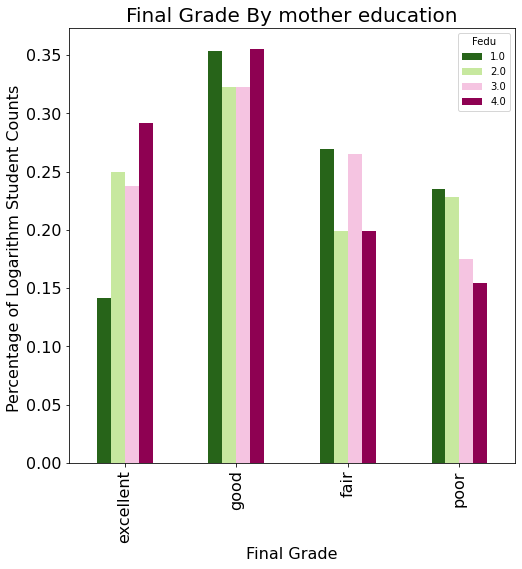

In [ ]:
plt.figure()
Fedu_perc.plot.bar(colormap="PiYG_r", fontsize=16, figsize=(8,8))
plt.title('Final Grade By mother education', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

Father job

In [ ]:
perc = (lambda col: col/col.sum())
index = ['excellent','good','fair','poor']
Fjob_pd1 = pd.crosstab(index=df.final_grade, columns=df.Fjob)
Fjob_pd = np.log(Fjob_pd1)
Fob_perc = Fjob_pd.apply(perc).reindex(index)

<Figure size 2052x756 with 0 Axes>

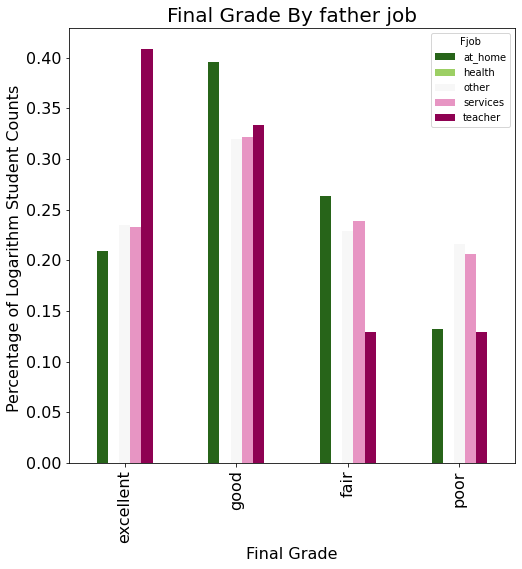

In [ ]:
plt.figure()
Fob_perc.plot.bar(colormap="PiYG_r", fontsize=16, figsize=(8,8))
plt.title('Final Grade By father job', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

Mother job

In [ ]:
perc = (lambda col: col/col.sum())
index = ['excellent','good','fair','poor']
Mjob_pd1 = pd.crosstab(index=df.final_grade, columns=df.Mjob)
Mjob_pd = np.log(Fjob_pd1)
Mjob_perc = Mjob_pd.apply(perc).reindex(index)

<Figure size 2052x756 with 0 Axes>

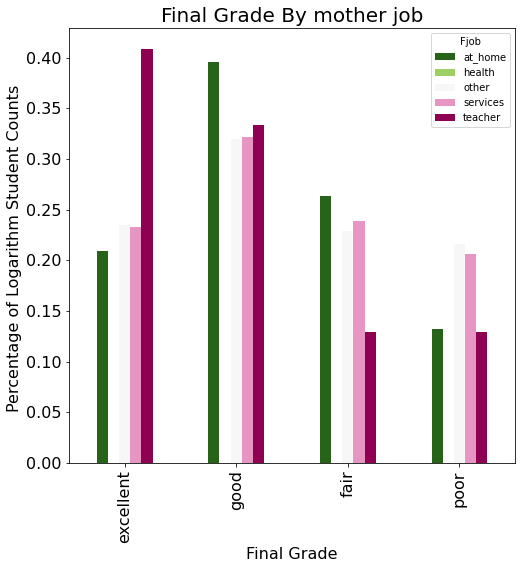

In [ ]:
plt.figure()
Mjob_perc.plot.bar(colormap="PiYG_r", fontsize=16, figsize=(8,8))
plt.title('Final Grade By mother job', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

9.RELATION BETWEEN AGE VS G1 AND G2

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


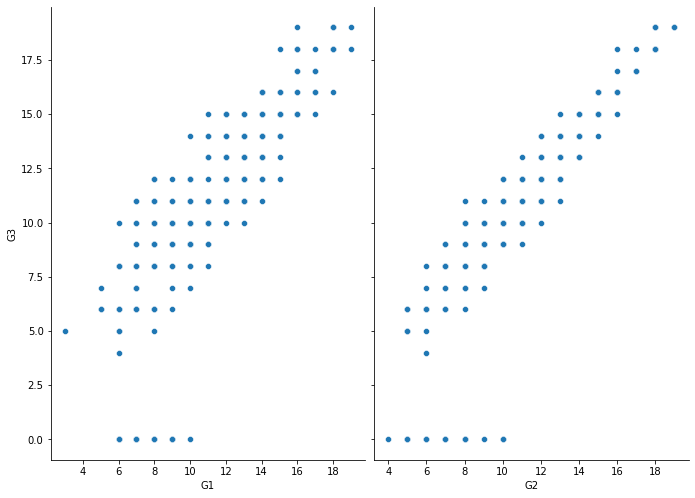

In [ ]:
sns.pairplot(df,x_vars=['G1','G2'],y_vars='G3',size=7,aspect=0.7)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


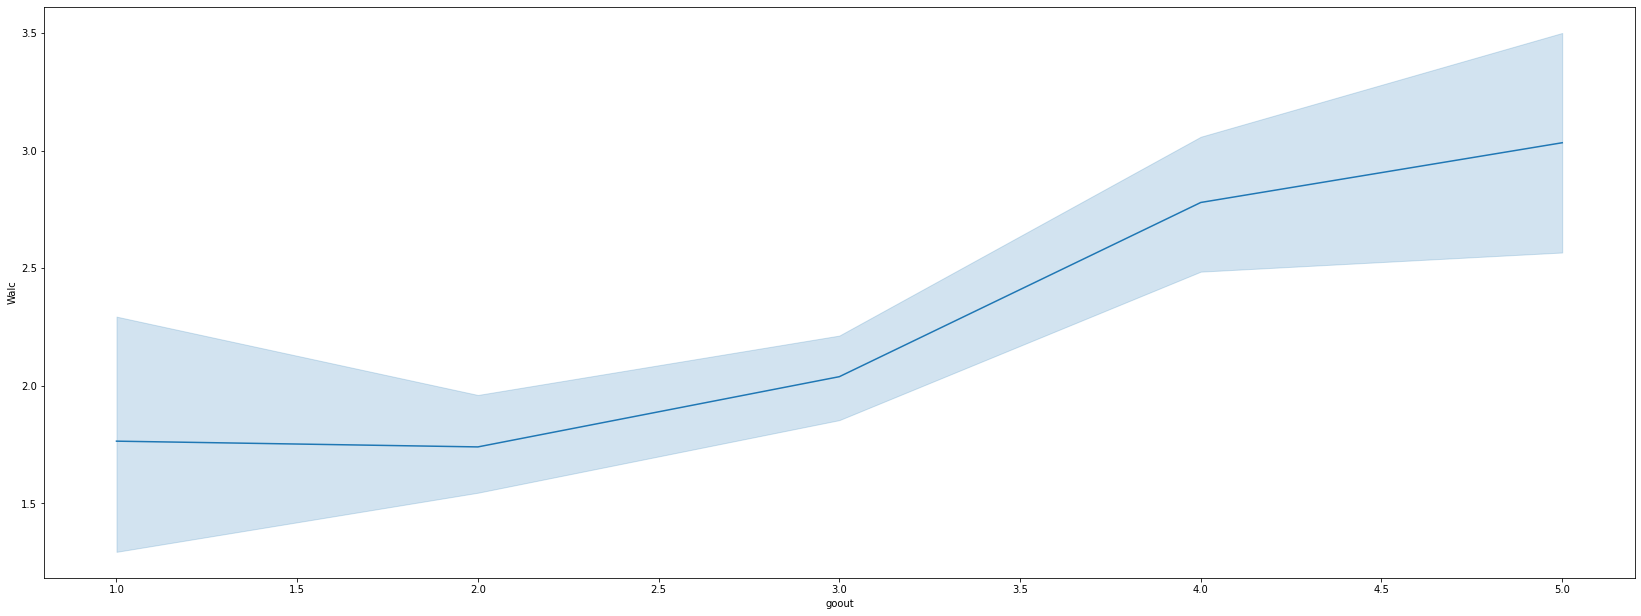

In [ ]:
sns.lineplot("goout","Walc",data=df);

Health vs Absences

In [ ]:
x="health"
y="absences"

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


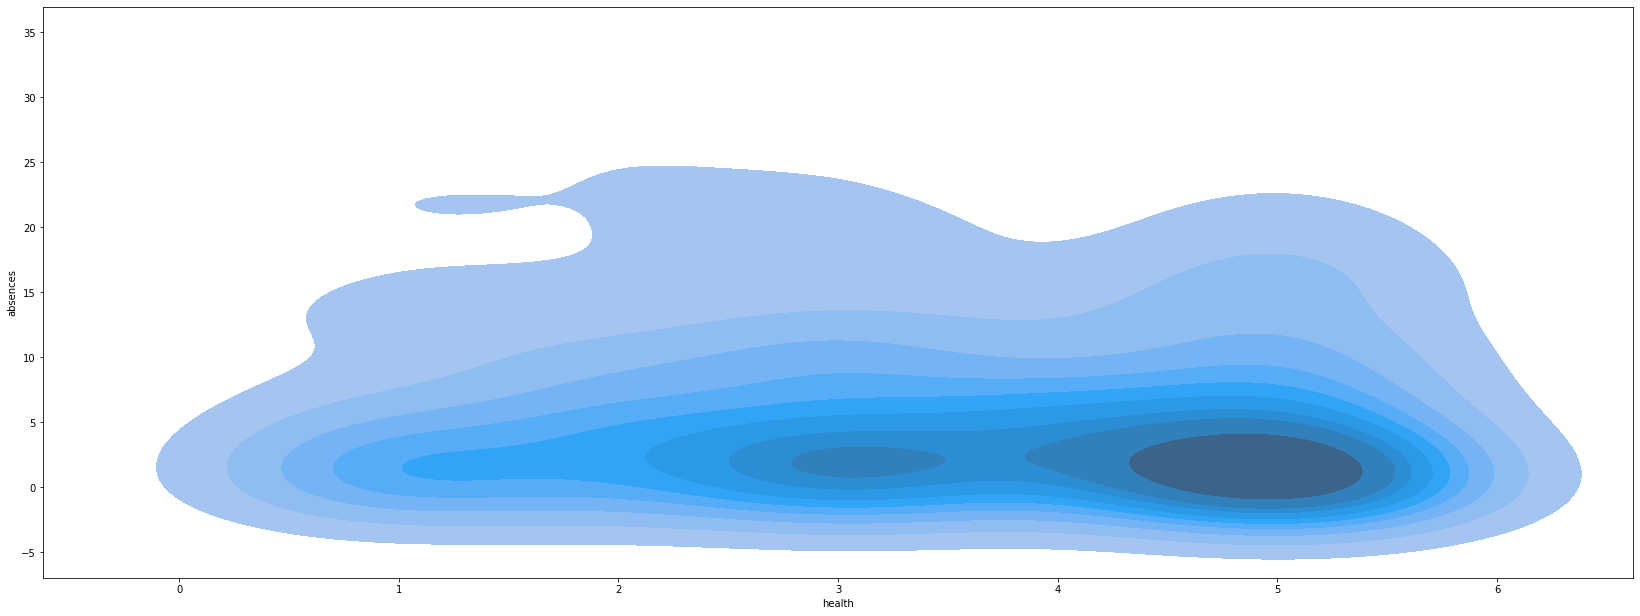

In [ ]:
sns.kdeplot(x,y,shade=True,data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


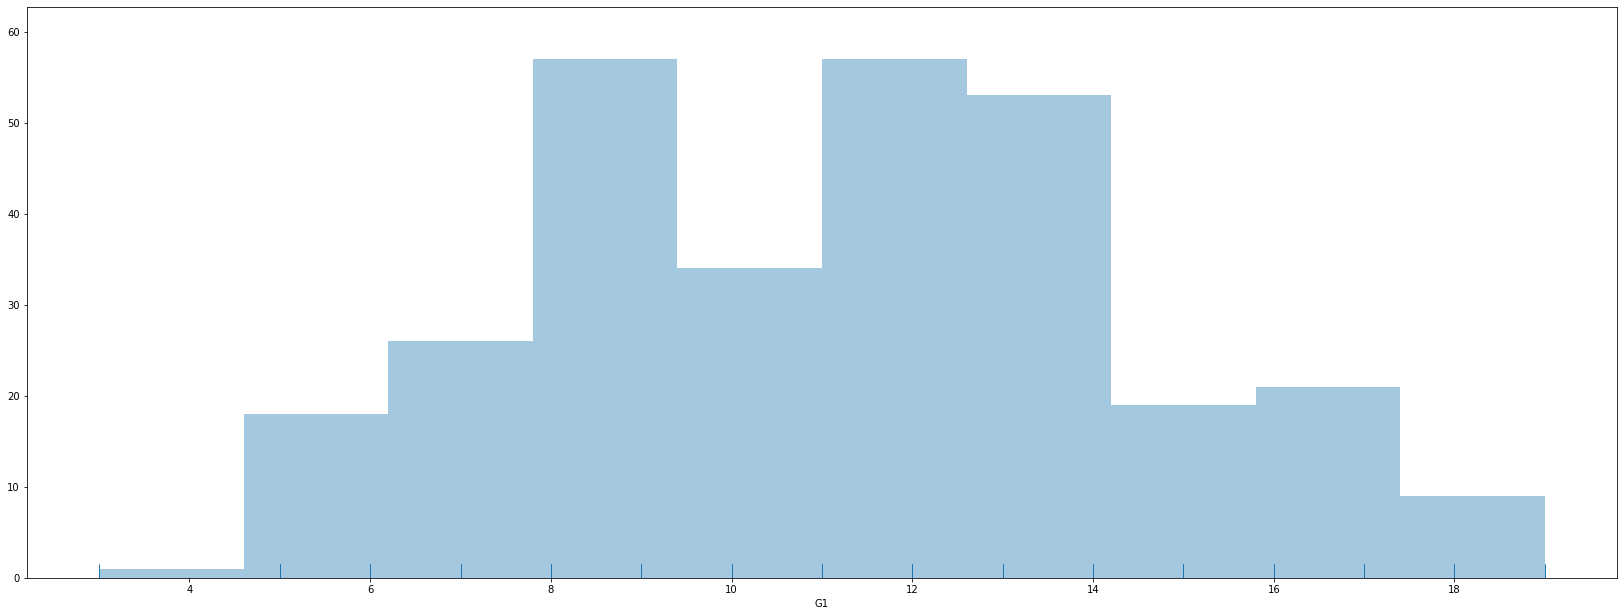

In [ ]:
sns.distplot(df["G1"],kde=False,rug=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


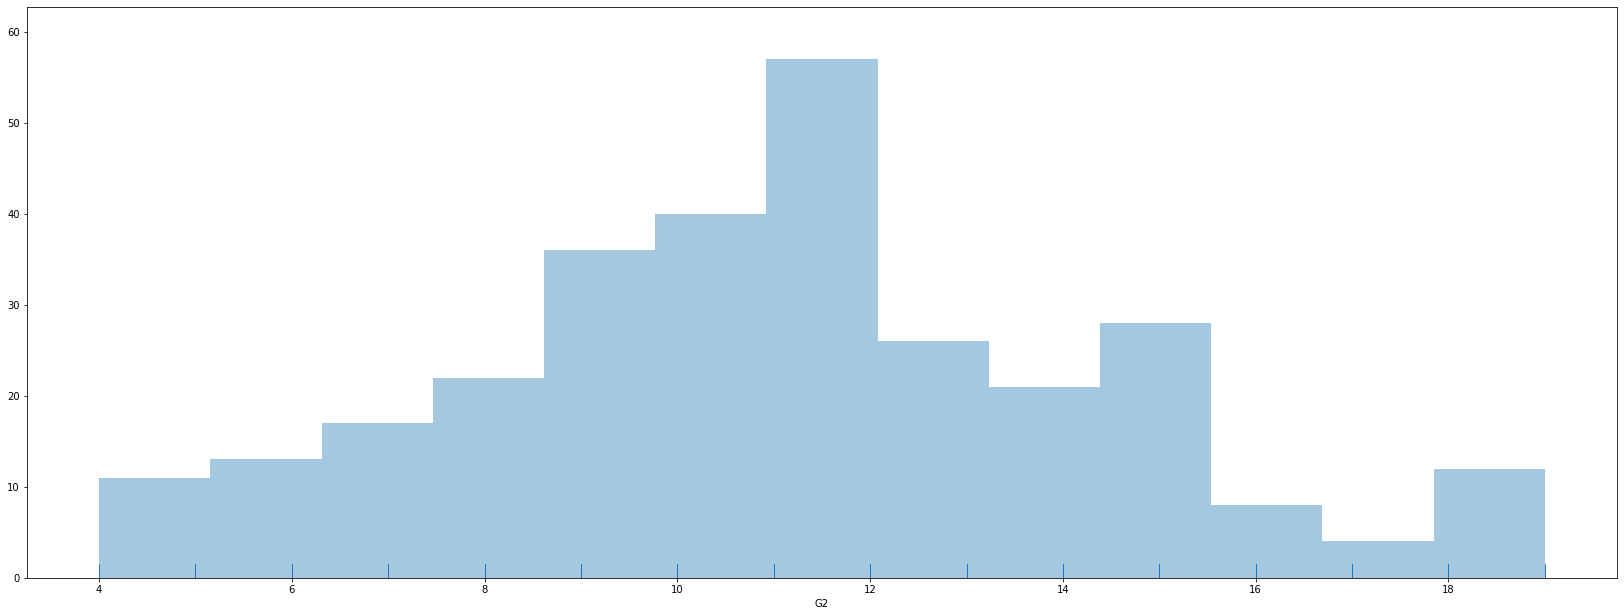

In [ ]:
sns.distplot(df["G2"],kde=False,rug=True)


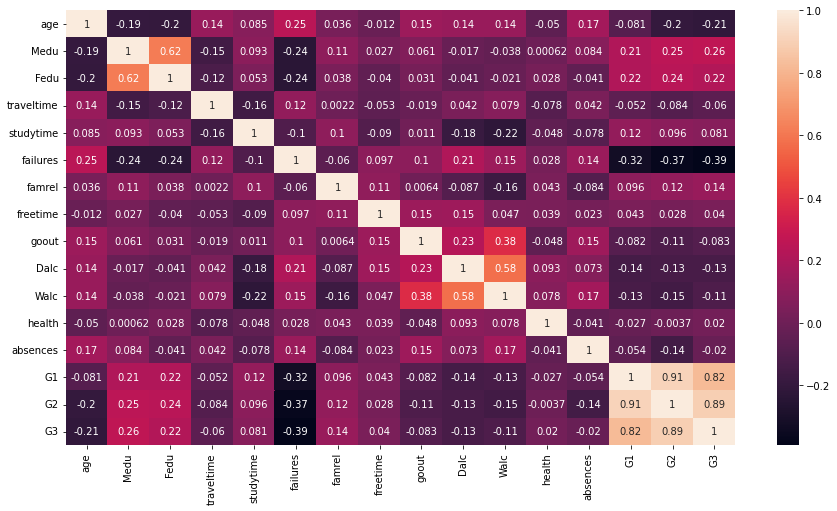

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

In [ ]:
df['sex']=df.sex.map({'F':1, 'M':0})
df['famsize'] = df.famsize.map({'GT3':0, 'LE3':1})
df['Pstatus'] = df.Pstatus.map({'T':0, 'A':1})
df['address'] = df.address.map({'U':0, 'R':1})
df['schoolsup'] = df.schoolsup.map({'yes':0, 'no':1})
df['famsup'] = df.famsup.map({'yes':0, 'no':1})
df['paid'] = df.paid.map({'yes':0, 'no':1})
df['activities'] = df.activities.map({'yes':0, 'no':1})
#df['nurserr'] = df.nursery.map({'yes':0, 'no':1})
df['higher'] = df.higher.map({'yes':0, 'no':1})
df['internet'] = df.internet.map({'yes':0, 'no':1})
df['romantic'] = df.romantic.map({'yes':0, 'no':1})
df['Fatherjob']=df.Fjob.map({'teacher':1,'health':2,'services':3,'at_home':4,'other':5})
df['Motherjob']=df.Mjob.map({'teacher':1,'health':2,'services':3,'at_home':4,'other':5})
#df['guardians']=df.guardian.map({'mother':0,'father':1,'other':2})
#df['reasons']=df.reason.map({'course':0,'reputataion':1,'home':2,'other':3})
df.drop(['nursery','Fjob','Mjob','guardian','reason','final_grade'],axis=1,inplace=True)

In [ ]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,goout,Dalc,Walc,health,absences,G1,G2,G3,Fatherjob,Motherjob
0,GP,1,18.0,0,0,1,4,4.0,2.0,2.0,...,4,1.0,1,3,6.0,5.0,6.0,6.0,1,4
1,GP,1,17.0,0,0,0,1,1.0,1.0,2.0,...,3,1.0,1,3,4.0,5.0,5.0,6.0,5,4
2,GP,1,15.0,0,1,0,1,1.0,1.0,2.0,...,2,2.0,3,3,10.0,7.0,8.0,10.0,5,4
3,GP,1,15.0,0,0,0,4,2.0,1.0,3.0,...,2,1.0,1,5,2.0,15.0,14.0,15.0,3,2
4,GP,1,16.0,0,0,0,3,3.0,1.0,2.0,...,2,1.0,2,5,4.0,6.0,10.0,10.0,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,MS,1,19.0,1,0,0,2,3.0,1.0,3.0,...,2,1.0,2,5,0.0,7.0,5.0,0.0,5,3
388,MS,1,18.0,0,1,0,3,1.0,1.0,2.0,...,4,1.0,1,1,0.0,7.0,9.0,8.0,3,1
392,MS,0,21.0,1,0,0,1,1.0,1.0,1.0,...,3,3.0,3,3,3.0,10.0,8.0,7.0,5,5
393,MS,0,18.0,1,1,0,3,2.0,3.0,1.0,...,1,3.0,4,5,0.0,11.0,12.0,10.0,5,3


In [ ]:
df.iloc[:,29]
for i in range(df.shape[1]):
  print(df.iloc[:,i].unique())
  print(df.iloc[:,i].value_counts())

['GP' 'MS']
GP    259
MS     36
Name: school, dtype: int64
[1 0]
1    154
0    141
Name: sex, dtype: int64
[18. 17. 15. 16. 19. 20. 21.]
17.0    76
16.0    75
15.0    63
18.0    60
19.0    18
20.0     2
21.0     1
Name: age, dtype: int64
[0 1]
0    233
1     62
Name: address, dtype: int64
[0 1]
0    213
1     82
Name: famsize, dtype: int64
[1 0]
0    267
1     28
Name: Pstatus, dtype: int64
[4 1 3 2 0]
4    100
2     77
3     70
1     45
0      3
Name: Medu, dtype: int64
[4. 1. 2. 3.]
2.0    84
3.0    76
4.0    75
1.0    60
Name: Fedu, dtype: int64
[2. 1. 3.]
1.0    201
2.0     75
3.0     19
Name: traveltime, dtype: int64
[2. 3. 1.]
2.0    157
1.0     81
3.0     57
Name: studytime, dtype: int64
[0 3 1 2]
0    236
1     39
2     11
3      9
Name: failures, dtype: int64
[0 1]
1    259
0     36
Name: schoolsup, dtype: int64
[1 0]
0    180
1    115
Name: famsup, dtype: int64
[1 0]
1    161
0    134
Name: paid, dtype: int64
[1 0]
0    155
1    140
Name: activities, dtype: int64
[0 1]
0    2

#LINEAR MODEL

In [ ]:
df.drop(['school'],axis=1,inplace=True)

In [ ]:
X=df.drop(['G3'],axis=1)
print(X)
y=df['G3']
print(y)

     sex   age  address  famsize  Pstatus  Medu  Fedu  traveltime  studytime  \
0      1  18.0        0        0        1     4   4.0         2.0        2.0   
1      1  17.0        0        0        0     1   1.0         1.0        2.0   
2      1  15.0        0        1        0     1   1.0         1.0        2.0   
3      1  15.0        0        0        0     4   2.0         1.0        3.0   
4      1  16.0        0        0        0     3   3.0         1.0        2.0   
..   ...   ...      ...      ...      ...   ...   ...         ...        ...   
387    1  19.0        1        0        0     2   3.0         1.0        3.0   
388    1  18.0        0        1        0     3   1.0         1.0        2.0   
392    0  21.0        1        0        0     1   1.0         1.0        1.0   
393    0  18.0        1        1        0     3   2.0         3.0        1.0   
394    0  19.0        0        1        0     1   1.0         1.0        1.0   

     failures  ...  freetime  goout  Da

In [ ]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn import metrics

linreg = LinearRegression()
linreg.fit(X, y)
df['G3_pred']=linreg.predict(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,train_size=0.75)
lm2 = LinearRegression()
lm2.fit(X_train, y_train)
y_pred = lm2.predict(X_test)

skl.mean_absolute_error(y_test,y_pred)

1.0630792609407393

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8609537992825378

In [ ]:
lm2.score(X,y)

0.8261908805252468

#DIFFERENT TRAIN-TEST RATIO'S

In [ ]:
X2=df.drop(['G3','age','traveltime','failures','goout','Dalc','Walc','absences'],axis=1)
print(X2)
y2=df['G3']
print(y2)

     sex  address  famsize  Pstatus  Medu  Fedu  studytime  schoolsup  famsup  \
0      1        0        0        1     4   4.0        2.0          0       1   
1      1        0        0        0     1   1.0        2.0          1       0   
2      1        0        1        0     1   1.0        2.0          0       1   
3      1        0        0        0     4   2.0        3.0          1       0   
4      1        0        0        0     3   3.0        2.0          1       0   
..   ...      ...      ...      ...   ...   ...        ...        ...     ...   
387    1        1        0        0     2   3.0        3.0          1       1   
388    1        0        1        0     3   1.0        2.0          1       0   
392    0        1        0        0     1   1.0        1.0          1       1   
393    0        1        1        0     3   2.0        1.0          1       1   
394    0        0        1        0     1   1.0        1.0          1       1   

     paid  ...  internet  r

In [ ]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

linreg2 = LinearRegression()
linreg2.fit(X2, y2)
df['G3_pred']=linreg2.predict(X2)

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=0,train_size=0.60)
lm3= LinearRegression()
lm3.fit(X2_train, y2_train)
y2_pred = lm3.predict(X2_test)

print(np.sqrt(metrics.mean_absolute_error(y2_test, y2_pred)))


1.1127085353574133


In [ ]:
from sklearn.metrics import r2_score
r2_score(y2_test, y2_pred)

0.8404630223001132

In [ ]:
lm3.score(X2,y2)

0.8227686908112112

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=0,train_size=0.8)
lm3 = LinearRegression()
lm3.fit(X2_train, y2_train)
y2_pred = lm3.predict(X2_test)
skl.mean_absolute_error(y2_test,y2_pred)


0.9736791182909877

In [ ]:
from sklearn.metrics import r2_score
r2_score(y2_test, y2_pred)

0.8822226228003115

In [ ]:
lm3.score(X2,y2)

0.8285777603446719

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=0,train_size=0.6)
lm3 = LinearRegression()
lm3.fit(X2_train, y2_train)
y2_pred = lm3.predict(X2_test)

print(np.sqrt(metrics.mean_squared_error(y2_test, y2_pred)))

1.6304646380063328


In [ ]:
from sklearn.metrics import r2_score
r2_score(y2_test, y2_pred)

0.8404630223001132

In [ ]:
lm3.score(X2,y2)

0.8227686908112112

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=0,train_size=0.75)
lm3 = LinearRegression()
lm3.fit(X2_train, y2_train)
y2_pred = lm3.predict(X2_test)

print(np.sqrt(metrics.mean_squared_error(y2_test, y2_pred)))

1.436169022170356


In [ ]:
from sklearn.metrics import r2_score
r2_score(y2_test, y2_pred)

0.8747094103442798

In [ ]:
lm3.score(X2,y2)


0.8281832037696109

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=0,train_size=0.80)
lm3 = LinearRegression()
lm3.fit(X2_train, y2_train)
y2_pred = lm3.predict(X2_test)

skl.mean_absolute_error(y_test,y_pred)


1.0630792609407393

In [ ]:
from sklearn.metrics import r2_score
r2_score(y2_test, y2_pred)

0.8822226228003115

In [ ]:
lm3.score(X2,y2)


0.8285777603446719

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=0,train_size=0.65)
lm3 = LinearRegression()
lm3.fit(X2_train, y2_train)
y2_pred = lm3.predict(X2_test)

print(np.sqrt(metrics.mean_squared_error(y2_test, y2_pred)))

1.6607407395657519


In [ ]:
from sklearn.metrics import r2_score
r2_score(y2_test, y2_pred)

0.8403785451067138

In [ ]:
lm3.score(X2,y2)

0.824055172189629

In [ ]:
df.shape

(295, 30)

#BAGGING

In [ ]:
from sklearn.ensemble import BaggingRegressor
import sklearn.metrics as metrics
bag_model = BaggingRegressor(
base_estimator=BaggingRegressor(), 
n_estimators=100, 
max_samples=0.8, 
bootstrap=True,
oob_score=True,
random_state=42
)
l=bag_model.fit(X_train, y_train)

In [ ]:
mae = metrics.mean_absolute_error(y_test, l.predict(X_test))

print("The mean abs error (MAE) on test set: {:.4f}".format(mae))

The mean abs error (MAE) on test set: 0.9647


#RANDOM FOREST


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))


Mean Absolute Error: 0.913243243243243


#DECISION TREES

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=3,min_samples_leaf = 10, random_state = 42)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=10, random_state=42)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
313,11.0,7.818182
311,13.0,11.714286
13,11.0,10.031250
291,15.0,15.360000
355,9.0,10.031250
...,...,...
32,16.0,15.360000
302,14.0,11.714286
345,14.0,13.514286
43,11.0,2.823529


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 1.1241373332549807


#BOOSTING

In [ ]:
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

In [ ]:
#Gradient boosting
regressor = GradientBoostingRegressor(max_depth=4,n_estimators=15,learning_rate=0.1,random_state=0)
regressor.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4, n_estimators=15, random_state=0)

In [ ]:
y_pred = regressor.predict(X_test)
mean_absolute_error(y_test, y_pred)

1.2296143429654514

In [ ]:
#ExtremeGradient Boosting
from xgboost import XGBRegressor
clf = XGBRegressor(n_estimators=100,
                   learning_rate=0.1,
                   random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
eg=mean_absolute_error(y_test, y_pred)
print(eg)

[11:19:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.831403369839127


In [ ]:
#Adaboosting
from sklearn.ensemble import AdaBoostRegressor

adaclf = AdaBoostRegressor( 
                            n_estimators=100,
                            learning_rate=0.1,
                            random_state=42)

adaclf.fit(X_train, y_train)
y_pred_1 = adaclf.predict(X_test)
ab=mean_absolute_error(y_test, y_pred_1)
print(ab)

1.0024053453069863


#NEURAL NETWORK

In [ ]:
import tensorflow as tf

In [ ]:
tf.random.set_seed(42)

In [ ]:
model= tf.keras.Sequential([
                             tf.keras.layers.Dense(28),
                            tf.keras.layers.Dense(14),
                            tf.keras.layers.Dense(7),
                             tf.keras.layers.Dense(3),
                             tf.keras.layers.Dense(2),
                            tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["mae"])

In [ ]:
history= model.fit(X_train, y_train, epochs=2500, verbose=0)

In [ ]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 5ms/step - loss: 0.9168 - mae: 0.9168


[0.9167572259902954, 0.9167572259902954]

In [ ]:
model.summary();

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 28)                812       
                                                                 
 dense_1 (Dense)             (None, 14)                406       
                                                                 
 dense_2 (Dense)             (None, 7)                 105       
                                                                 
 dense_3 (Dense)             (None, 3)                 24        
                                                                 
 dense_4 (Dense)             (None, 2)                 8         
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 1,358
Trainable params: 1,358
Non-trainabl

Text(0.5, 0, 'epochs')

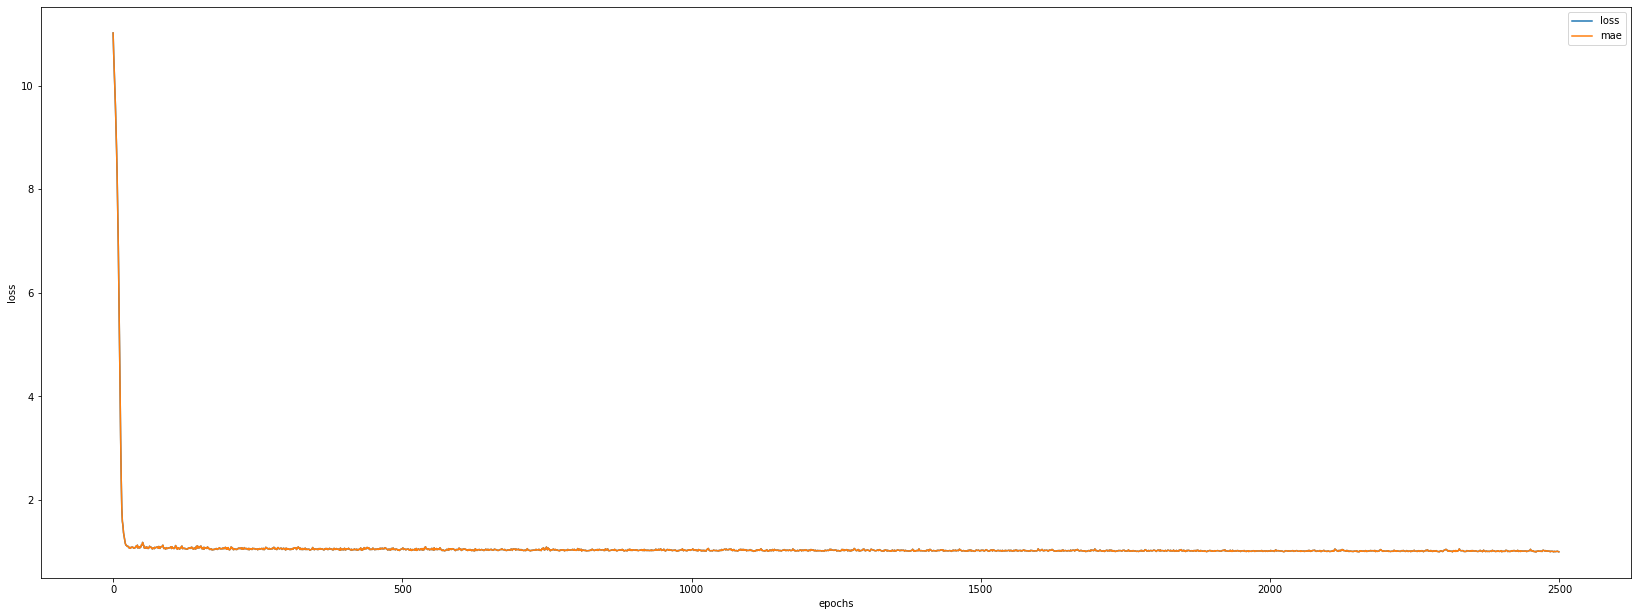

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")